<a href="https://colab.research.google.com/github/SanduniJayasinghe/DL_lab02/blob/main/MLP_with_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt

from tensorflow.keras.regularizers import l1, l2
from sklearn.metrics import confusion_matrix
import seaborn as sns

import numpy as np


Load the MNIST dataset

In [24]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [6 3 2 8 0 9 7 6 0 1]


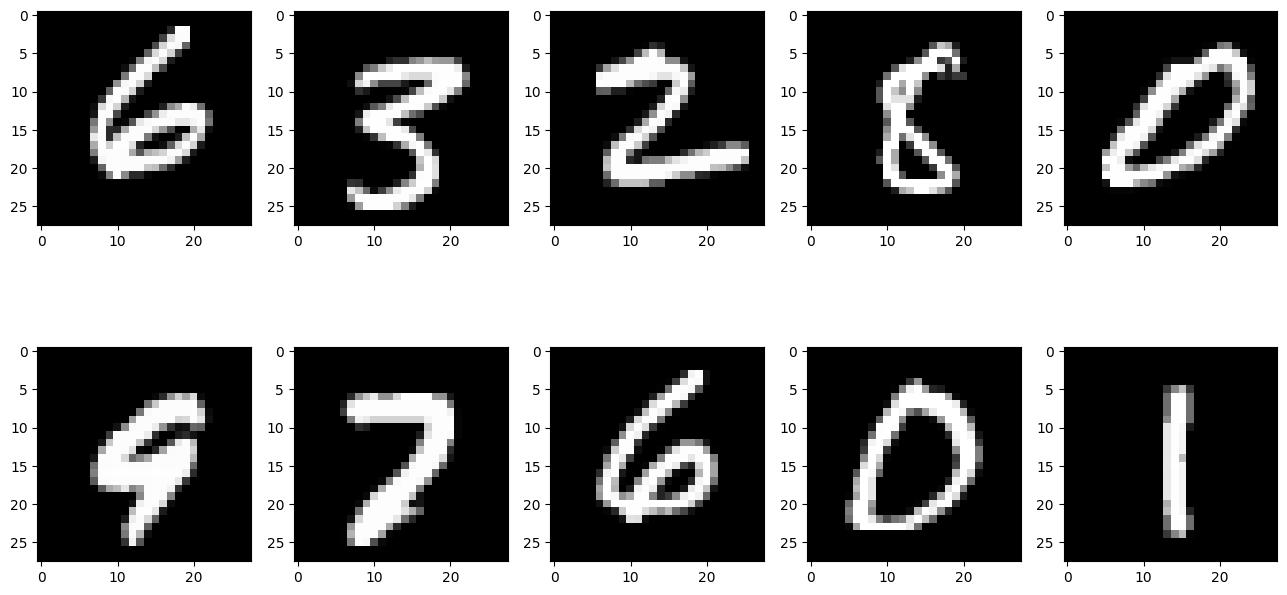

In [25]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [26]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [27]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

# Adjusting the number of neurons in the hidden layers
model.add(Dense(128, activation='relu'))  # Example: Changing to 128 neurons
model.add(Dense(128, activation='relu'))  # Example: Adding another layer with 128 neurons


model.add(Dense(64,activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 10)               

Train the model

In [29]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4075 - accuracy: 0.9179
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1506 - accuracy: 0.9641
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1122 - accuracy: 0.9719
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0903 - accuracy: 0.9778
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0763 - accuracy: 0.9812
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0651 - accuracy: 0.9851
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0576 - accuracy: 0.9860
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0516 - accuracy: 0.9877
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0430 - accuracy: 0.9901
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.042

Plot the loss and accuracy graphs

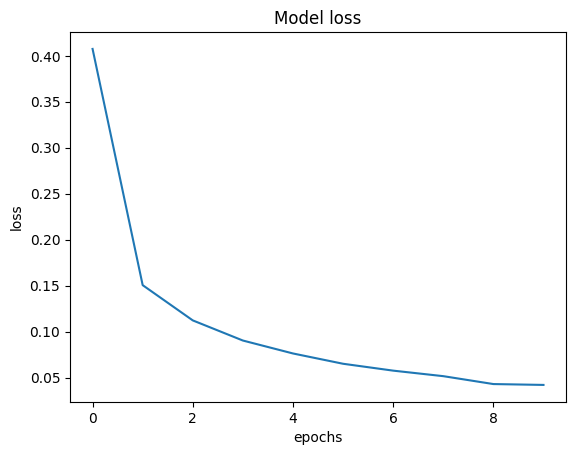

In [30]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

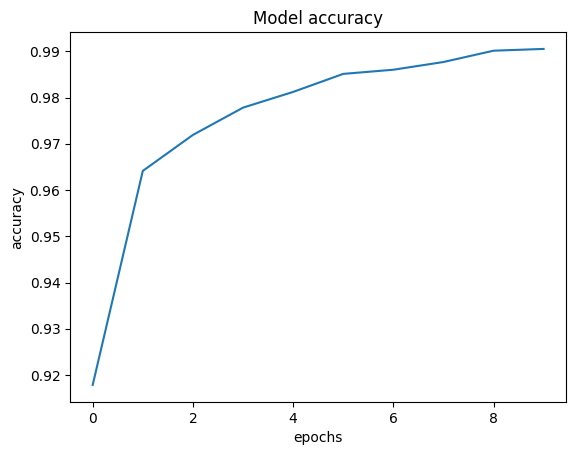

In [31]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [32]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 0s 1ms/step - loss: 0.1134 - accuracy: 0.9741
Loss of the Test dataset is: 0.11342599242925644
Accuracy of the test dataset is: 0.9740999937057495


313/313 [==============================] - 0s 991us/step


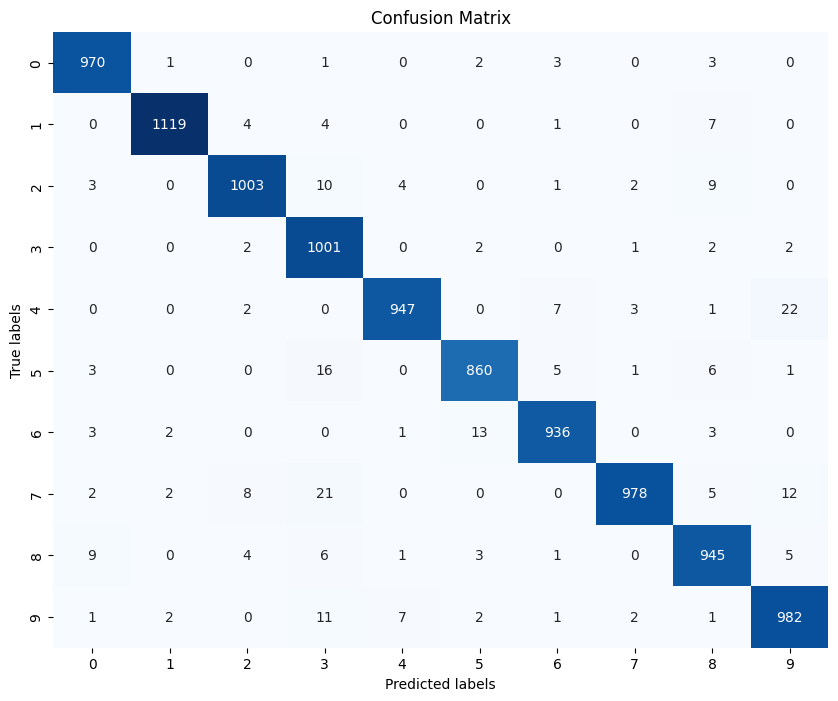

In [33]:
# Get model predictions for the test data
test_predictions = model.predict(new_test_data)
predicted_labels = np.argmax(test_predictions, axis=1)

# Create the confusion matrix
cm = confusion_matrix(test_target, predicted_labels)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



Save the model weights

In [22]:
model.save_weights('MNIST_WEIGHTS_V1.h5')